In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz

In [2]:
df = pd.read_csv('final_df.csv')
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,5,male,58.0,USA,25.80,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,male,68.0,USA,28.75,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,5,female,59.0,USA,23.66,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,5,female,56.0,USA,43.85,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df.drop(['Sex', 'Age', 'Country', 'BMI'], axis=1)

In [4]:
df_columns = df.columns
df

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,5,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_label_string = df['Condition'].unique()

In [6]:
y = df['Condition']
X = df.drop(['Condition'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [8]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [9]:
params = {'eta': [0.1, 0.3, 0.8],
         'objective': ['reg:squarederror', 'logistic']}

In [10]:
grid_search = GridSearchCV(XGBClassifier(), params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'eta': 0.8, 'objective': 'reg:squarederror'}


In [11]:
best_params = {'eta': 0.8}

In [12]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 10
bst = xgb.train(best_params, dtrain, num_round, evallist)

[0]	train-rmse:0.83427	eval-rmse:1.17763
[1]	train-rmse:0.70936	eval-rmse:1.19464
[2]	train-rmse:0.67819	eval-rmse:1.16379
[3]	train-rmse:0.64350	eval-rmse:1.14968
[4]	train-rmse:0.63390	eval-rmse:1.14961
[5]	train-rmse:0.61886	eval-rmse:1.14827
[6]	train-rmse:0.60719	eval-rmse:1.15225
[7]	train-rmse:0.58666	eval-rmse:1.13379
[8]	train-rmse:0.57159	eval-rmse:1.13356
[9]	train-rmse:0.56932	eval-rmse:1.13349


/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


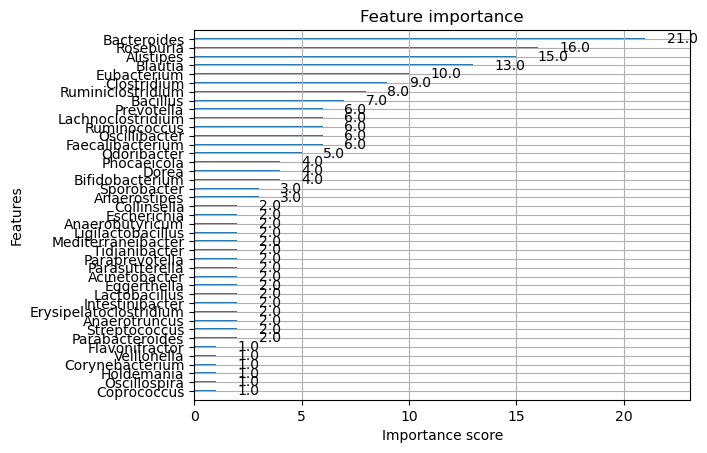

In [13]:
ypred = bst.predict(dtest)

xgb.plot_importance(bst)
#plt.savefig('xgb_feature_importance.jpg')
plt.show()

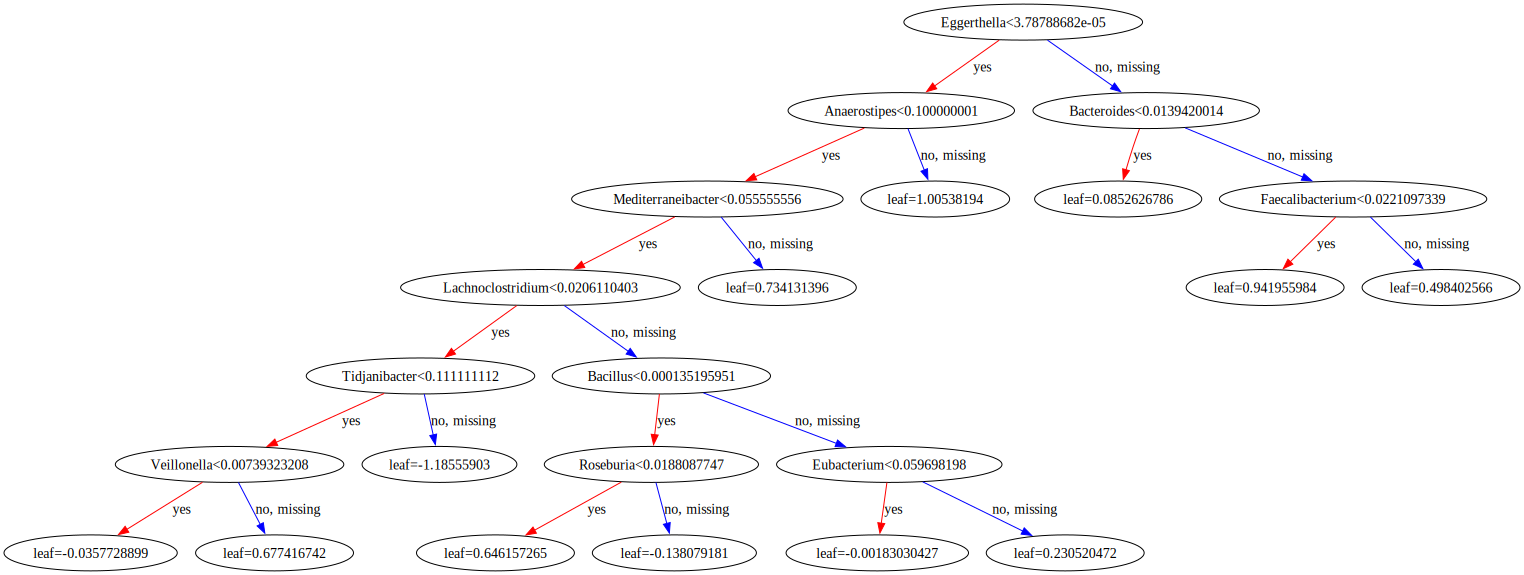

<Figure size 1000x800 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 8))
xgb.to_graphviz(bst, tree_idx=2)

In [15]:
xgb = XGBClassifier(eta=0.8, probability=True, random_state=23)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
#y_pred

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [07:11:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "probability" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
y_test_array = np.array(y_test)
#y_test_array

In [17]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

0.9193

In [18]:
report = classification_report(y_test, y_pred, target_names=df_label_string, output_dict=True)
report_df = pd.DataFrame(report).T
report_df

,precision,recall,f1-score,support
0,0.947368,0.837209,0.888889,43.000000
1,1.000000,1.000000,1.000000,11.000000
2,1.000000,1.000000,1.000000,10.000000
3,0.945701,0.990521,0.967593,211.000000
4,1.000000,1.000000,1.000000,5.000000
5,0.636364,0.538462,0.583333,26.000000
6,1.000000,0.571429,0.727273,7.000000
7,1.000000,0.666667,0.800000,6.000000
8,0.428571,1.000000,0.600000,3.000000
accuracy,0.919255,0.919255,0.919255,0.919255


In [19]:
y_prob = xgb.predict_proba(X_test)
y_prob[1]

array([1.3767931e-03, 1.5397612e-03, 6.9174106e-04, 2.5832851e-04,
       9.0935931e-04, 2.5120729e-03, 7.2000932e-04, 1.5402865e-01,
       8.3796328e-01], dtype=float32)

In [20]:
y_test_bin = label_binarize(y_test_array, classes=np.arange(9))  # Shape: (num_samples, 8)
y_test_bin[1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0])

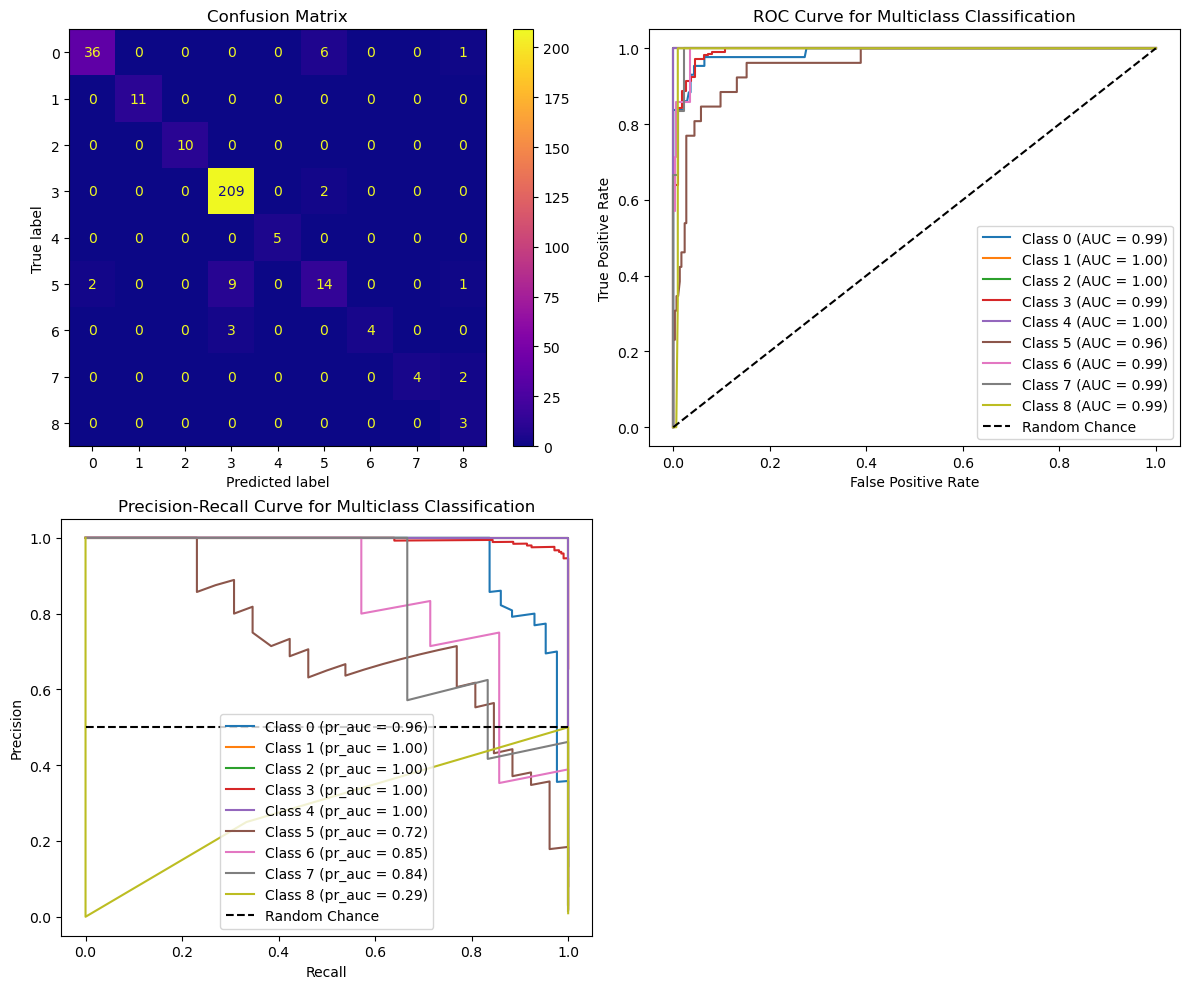

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
for i in range(9): 
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0, 1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
for i in range(9): 
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    axs[1, 0].plot(recall, precision, label=f'Class {i} (pr_auc = {pr_auc:.2f})')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('xgb_alldata_graphs.jpg')
plt.show()
